In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier


from prettytable import PrettyTable
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [2]:
df= pd.read_csv("E:/quora/final_features.csv")

In [3]:
df.shape

(404290, 629)

# choosing sample of the datasset (n=100000)

In [4]:
df=df.sample(n=100000)

In [5]:
df.shape

(100000, 629)

In [6]:
df.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
253171,253171,253171,1,0.999967,0.749981,0.833319,0.714276,0.799992,0.799992,1.0,...,-0.099598,0.236732,-0.526353,-0.494349,-0.671335,0.285313,-0.194697,-0.190981,-0.148370,0.259011
146943,146943,146943,1,0.499994,0.444440,0.499988,0.499988,0.499996,0.428568,1.0,...,-1.292290,0.432267,-0.050426,-0.956324,-0.306120,1.005976,0.097448,-1.012515,0.492208,0.708433
23432,23432,23432,1,0.599988,0.499992,0.000000,0.000000,0.272725,0.214284,1.0,...,-0.093982,-0.112792,0.640446,-0.586346,-0.155640,1.235254,0.356057,0.585621,0.222291,-0.062597
73194,73194,73194,0,0.199996,0.111110,0.499992,0.333330,0.363633,0.199999,0.0,...,-1.919133,0.372333,0.727697,0.345668,0.584977,-0.683830,0.251069,0.576127,-0.689538,0.390392
234068,234068,234068,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-1.010405,0.210964,0.360546,-0.885429,-0.172324,-0.079231,-0.397419,0.287044,1.813180,1.224098


In [7]:
final_df=df.drop(['Unnamed: 0','id'],axis=1)

In [8]:
final_df

,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
253171,1,0.999967,0.749981,0.833319,0.714276,0.799992,0.799992,1.0,1.0,0.0,...,-0.099598,0.236732,-0.526353,-0.494349,-0.671335,0.285313,-0.194697,-0.190981,-0.148370,0.259011
146943,1,0.499994,0.444440,0.499988,0.499988,0.499996,0.428568,1.0,1.0,2.0,...,-1.292290,0.432267,-0.050426,-0.956324,-0.306120,1.005976,0.097448,-1.012515,0.492208,0.708433
23432,1,0.599988,0.499992,0.000000,0.000000,0.272725,0.214284,1.0,0.0,3.0,...,-0.093982,-0.112792,0.640446,-0.586346,-0.155640,1.235254,0.356057,0.585621,0.222291,-0.062597
73194,0,0.199996,0.111110,0.499992,0.333330,0.363633,0.199999,0.0,1.0,9.0,...,-1.919133,0.372333,0.727697,0.345668,0.584977,-0.683830,0.251069,0.576127,-0.689538,0.390392
234068,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,9.0,...,-1.010405,0.210964,0.360546,-0.885429,-0.172324,-0.079231,-0.397419,0.287044,1.813180,1.224098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121875,1,0.499988,0.399992,0.666644,0.499988,0.499994,0.499994,0.0,1.0,0.0,...,-0.189118,0.955134,1.228289,1.469740,1.123725,-0.801836,-1.225557,-0.393577,-0.654435,0.814154
301518,1,0.571420,0.499994,0.666656,0.666656,0.571424,0.571424,1.0,1.0,0.0,...,-1.726018,0.843809,0.536491,-0.588506,-0.575593,0.716940,-0.282781,-0.608582,-0.555443,-0.142142
91233,0,0.333322,0.333322,0.333322,0.249994,0.333328,0.285710,0.0,1.0,1.0,...,1.937138,0.335433,-0.326585,-1.195912,0.999270,0.258766,0.314324,-0.213347,1.085075,0.134298
206217,0,0.249994,0.090908,0.666644,0.285710,0.428565,0.166666,0.0,0.0,11.0,...,0.043647,0.630496,-1.497374,0.716662,-0.175755,-0.552482,-1.784326,-1.016163,0.222500,0.985264


In [9]:
final_df.reset_index(inplace=True)

In [10]:
final_df

,index,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,253171,1,0.999967,0.749981,0.833319,0.714276,0.799992,0.799992,1.0,1.0,...,-0.099598,0.236732,-0.526353,-0.494349,-0.671335,0.285313,-0.194697,-0.190981,-0.148370,0.259011
1,146943,1,0.499994,0.444440,0.499988,0.499988,0.499996,0.428568,1.0,1.0,...,-1.292290,0.432267,-0.050426,-0.956324,-0.306120,1.005976,0.097448,-1.012515,0.492208,0.708433
2,23432,1,0.599988,0.499992,0.000000,0.000000,0.272725,0.214284,1.0,0.0,...,-0.093982,-0.112792,0.640446,-0.586346,-0.155640,1.235254,0.356057,0.585621,0.222291,-0.062597
3,73194,0,0.199996,0.111110,0.499992,0.333330,0.363633,0.199999,0.0,1.0,...,-1.919133,0.372333,0.727697,0.345668,0.584977,-0.683830,0.251069,0.576127,-0.689538,0.390392
4,234068,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,-1.010405,0.210964,0.360546,-0.885429,-0.172324,-0.079231,-0.397419,0.287044,1.813180,1.224098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,121875,1,0.499988,0.399992,0.666644,0.499988,0.499994,0.499994,0.0,1.0,...,-0.189118,0.955134,1.228289,1.469740,1.123725,-0.801836,-1.225557,-0.393577,-0.654435,0.814154
99996,301518,1,0.571420,0.499994,0.666656,0.666656,0.571424,0.571424,1.0,1.0,...,-1.726018,0.843809,0.536491,-0.588506,-0.575593,0.716940,-0.282781,-0.608582,-0.555443,-0.142142
99997,91233,0,0.333322,0.333322,0.333322,0.249994,0.333328,0.285710,0.0,1.0,...,1.937138,0.335433,-0.326585,-1.195912,0.999270,0.258766,0.314324,-0.213347,1.085075,0.134298
99998,206217,0,0.249994,0.090908,0.666644,0.285710,0.428565,0.166666,0.0,0.0,...,0.043647,0.630496,-1.497374,0.716662,-0.175755,-0.552482,-1.784326,-1.016163,0.222500,0.985264


In [11]:
Y_t=final_df['is_duplicate']

In [12]:
Y_t.shape

(100000,)

In [13]:
final_df=final_df.drop(['index','is_duplicate'],axis=1)

In [14]:
final_df.shape

(100000, 626)

# Splitting of dataset(75:25)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(final_df,Y_t,test_size=0.25)

In [16]:
print("Number of observation in train data :",x_train.shape)
print("Number of observation in test data :",x_test.shape)

Number of observation in train data : (75000, 626)
Number of observation in test data : (25000, 626)


In [17]:
print("Number of observation in train data :",y_train.shape)
print("Number of observation in test data :",y_test.shape)

Number of observation in train data : (75000,)
Number of observation in test data : (25000,)


In [18]:
print("-"*10, "Distribution of output variable in train data", "-"*10,"\n")
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len,"\n")
print("-"*10, "Distribution of output variable in test data", "-"*10,"\n")
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ---------- 

Class 0:  0.63052 Class 1:  0.36948 

---------- Distribution of output variable in test data ---------- 

Class 0:  0.63136 Class 1:  0.36864


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]
    
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# CREATING A RANDOM MODEL

Log loss on Test Data using Random Model 0.8859204368223189


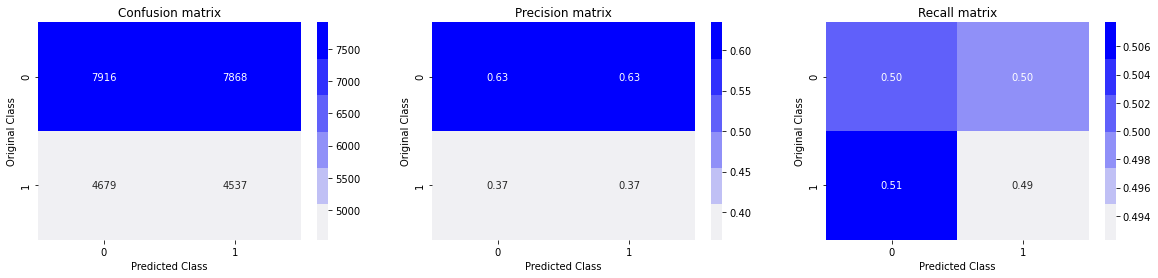

In [21]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

# Logistic regression

For values of alpha =  1e-05 The log loss is: 0.43024033416384866
For values of alpha =  0.0001 The log loss is: 0.4363270978671932
For values of alpha =  0.001 The log loss is: 0.4353280804337848
For values of alpha =  0.01 The log loss is: 0.4080873530030714
For values of alpha =  0.1 The log loss is: 0.43297376321334596
For values of alpha =  1 The log loss is: 0.4726407341269661
For values of alpha =  10 The log loss is: 0.5317561132741153


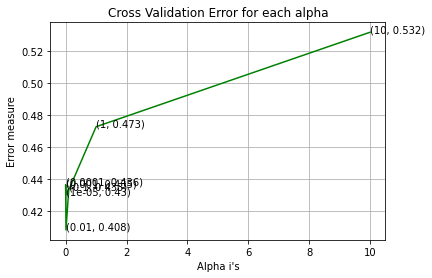

For values of best alpha =  0.01 The train log loss is: 0.40454438441615514
For values of best alpha =  0.01 The test log loss is: 0.4080873530030714
Total number of data points : 25000


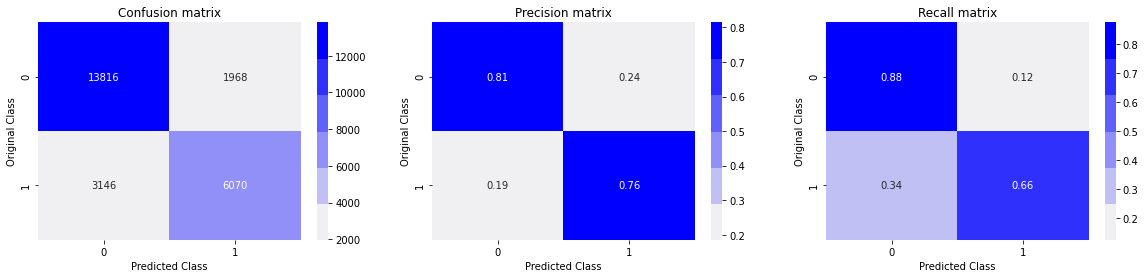

In [22]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


# Linear SVM

For values of alpha =  1e-05 The log loss is: 0.41736081483444504
For values of alpha =  0.0001 The log loss is: 0.4366610285767853
For values of alpha =  0.001 The log loss is: 0.4450229287393217
For values of alpha =  0.01 The log loss is: 0.5167794384752843
For values of alpha =  0.1 The log loss is: 0.5062631968704931
For values of alpha =  1 The log loss is: 0.5696378416878602
For values of alpha =  10 The log loss is: 0.6394582982282664


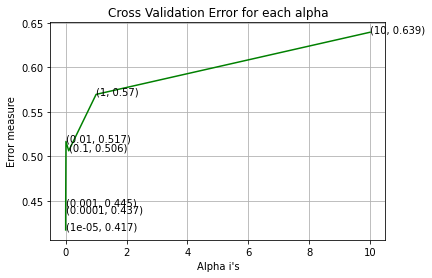

For values of best alpha =  1e-05 The train log loss is: 0.41362153992417333
For values of best alpha =  1e-05 The test log loss is: 0.41736081483444504
Total number of data points : 25000


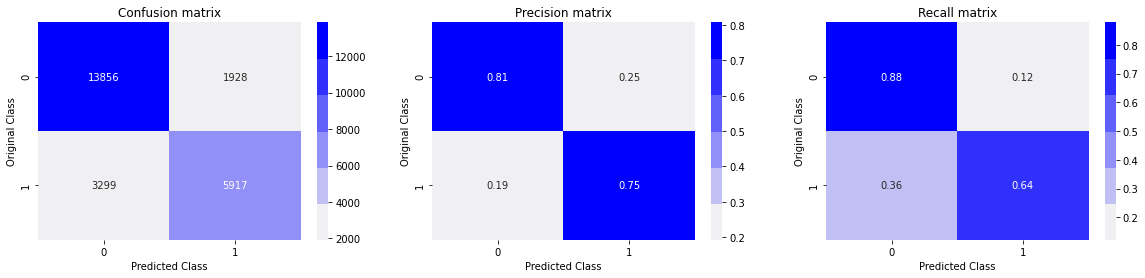

In [23]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [24]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20,
                verbose_eval=10)

xgdmat = xgb.DMatrix(x_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

predicted_y =np.array(predict_y>0.5,dtype=int)

[0]	train-logloss:0.68488	valid-logloss:0.68479
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61570	valid-logloss:0.61510
[20]	train-logloss:0.56393	valid-logloss:0.56273
[30]	train-logloss:0.52630	valid-logloss:0.52467
[40]	train-logloss:0.49664	valid-logloss:0.49470
[50]	train-logloss:0.47373	valid-logloss:0.47154
[60]	train-logloss:0.45552	valid-logloss:0.45312
[70]	train-logloss:0.44053	valid-logloss:0.43807
[80]	train-logloss:0.42864	valid-logloss:0.42611
[90]	train-logloss:0.41901	valid-logloss:0.41642
[100]	train-logloss:0.41097	valid-logloss:0.40838
[110]	train-logloss:0.40419	valid-logloss:0.40165
[120]	train-logloss:0.39848	valid-logloss:0.39590
[130]	train-logloss:0.39351	valid-logloss:0.39107
[140]	train-logloss:0.38936	valid-logloss:0.38707
[150]	train-logloss:0.38583	valid-logloss:0.38363
[160]	train-logloss:0.38276	valid-logloss:0.38072
[170]	trai

Total number of data points : 25000


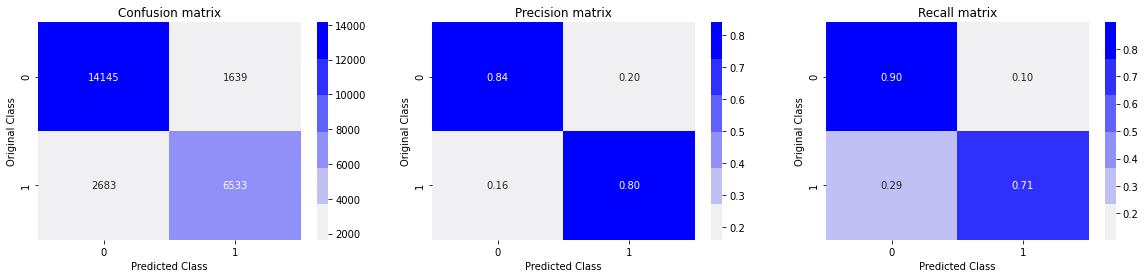

In [25]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [31]:

df = pd.DataFrame({
    'Model': ["Logistic Regression", "SVC", "XGBoost"], 
    
    'Log-Loss': [0.408,0.417,0.349]
})
df

,Model,Log-Loss
0,Logistic Regression,0.408
1,SVC,0.417
2,XGBoost,0.349


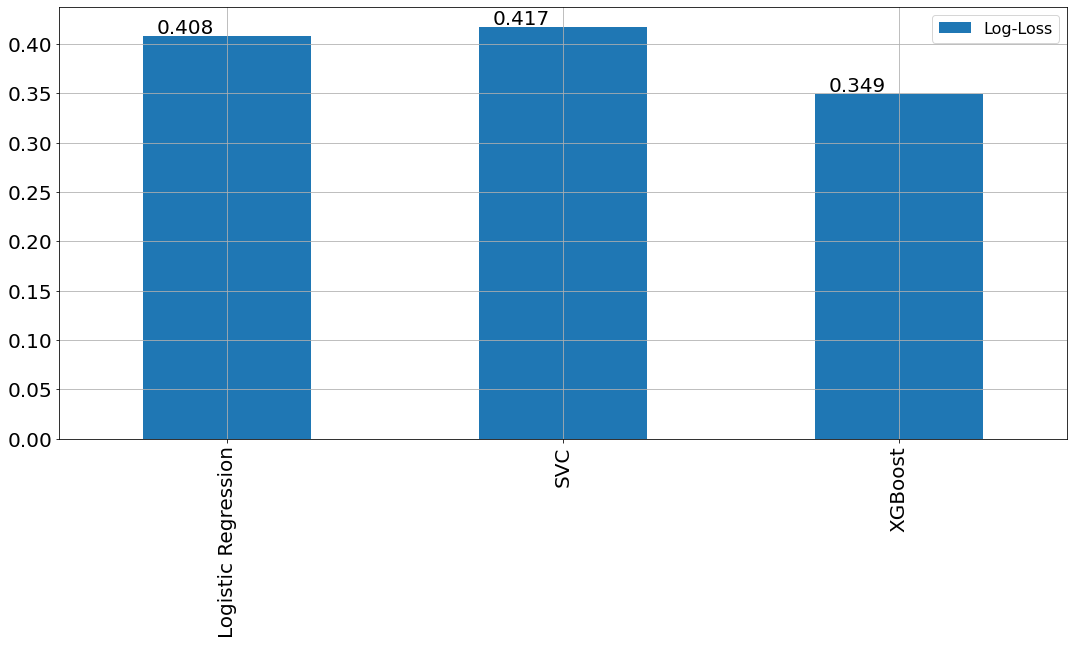

In [32]:

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1,1])
df.plot(x = 'Model', y =  'Log-Loss', figsize = (14, 6), kind = 'bar', ax = axes, grid = True)
plt.legend(fontsize = 16)
axes.set_xlabel("")
axes.tick_params(labelsize = 20)
for i in axes.patches:
    axes.text(i.get_x()+0.04, i.get_height()+0.003, str(round(i.get_height(), 4)), fontsize=20, color='black')
plt.show()